<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-2-Kaggle-Challenge/blob/master/db_LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 2.3MB/s 
     |████████████████████████████████| 194kB 2.8MB/s 
     |████████████████████████████████| 10.4MB 6.2MB/s 
     |████████████████████████████████| 614kB 54.3MB/s 
     |████████████████████████████████| 1.5MB 49.7MB/s 
     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 256kB 44.8MB/s 
     |████████████████████████████████| 307kB 52.9MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 215kB 49.7MB/s 
     |████████████████████████████████| 747kB 51.9MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=246f82b49727dbc20a05f9e53be9de4fcf790d2fe1cdc456d85397744ded485d
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f


In [1]:
import pandas as pd
DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

# Split train into train and val
train, val = train_test_split(train, train_size=0.80, test_size=0.20, stratify=train['status_group'], random_state=42)
train.shape, test.shape, val.shape



((47520, 41), (14358, 40), (11880, 41))

In [2]:
# Check Pandas Profiling version
import pandas_profiling

pandas_profiling.__version__

'2.5.0'

In [3]:
# Old code for Pandas Profiling version 2.3
# It can be very slow with medium & large datasets.
# These parameters will make it faster.

# profile = train.profile_report(
#     check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )
#

# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [4]:
# Let's find the baselines for classification first
train['status_group'].value_counts(normalize=True)

functional                 0.543077
non functional             0.384238
functional needs repair    0.072685
Name: status_group, dtype: float64

Functional: 54.3%

Non Functional: 38.4%

Functional Needs Repair: 7.2%

In [5]:
# Look at the first five rows of the train dataframe
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
43360,72938,0.0,2011-07-27,NaN,0,NaN,33.542898,-9.174777,Kwa Mzee Noa,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
7263,65358,500.0,2011-03-23,Rc Church,2049,ACRA,34.665760,-9.308548,Kwa Yasinta Ng'Ande,0,Rufiji,Kitichi,Iringa,11,4,Njombe,Imalinyi,175,True,GeoData Consultants Ltd,WUA,Tove Mtwango gravity Scheme,True,2008,gravity,gravity,gravity,wua,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
2486,469,25.0,2011-03-07,Donor,290,Do,38.238568,-6.179919,Kwasungwini,0,Wami / Ruvu,Kwedigongo,Pwani,6,1,Bagamoyo,Mbwewe,2300,True,GeoData Consultants Ltd,VWC,NaN,False,2010,india mark ii,india mark ii,handpump,vwc,user-group,pay per bucket,per bucket,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
313,1298,0.0,2011-07-31,Government Of Tanzania,0,DWE,30.716727,-1.289055,Kwajovin 2,0,Lake Victoria,Kihanga,Kagera,18,1,Karagwe,Isingiro,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
52726,27001,0.0,2011-03-10,Water,0,Gove,35.389331,-6.399942,Chama,0,Internal,Mtakuj,Dodoma,1,6,Bahi,Nondwa,0,True,GeoData Consultants Ltd,VWC,Zeje,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional


In [6]:
# Select which features we want to use now
# Let's test out water quality and source features
# First look out the two functions compared to status group visually
import plotly.express as px
px.scatter(train, x='region_code', y='district_code', color='status_group', opacity=0.1)

In [7]:
# Look at the summary statistics of train
train[['region_code', 'district_code']].describe()

,region_code,district_code
count,47520.000000,47520.000000
mean,15.258291,5.616751
std,17.530228,9.621230
min,1.000000,0.000000
25%,5.000000,2.000000
50%,12.000000,3.000000
75%,17.000000,5.000000
max,99.000000,80.000000


In [8]:
# Select features
target = 'status_group' # Set target

# Form dataframe with all train columns excluding target and id
train_features = train.drop(columns=[target, 'id'])

# Get list of numeric featues
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

# Get series with cardinality of nonnumeric features
cardinality = train_features.select_dtypes(exclude='number').nunique()

# Get list of all categorical features with cardinality <= 50
categorical_features = cardinality[cardinality <= 50].index.tolist()

# Combine lists
features = numeric_features + categorical_features
print(features)

['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Arrange data into X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [10]:
# Use pipeline and find train and validation accuracy using logistic regression
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    LogisticRegression(multi_class='auto', solver='lbfgs', n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.7344486531986532
Validation accuracy: 0.7319023569023569


In [11]:
# Look into the steps inside pipeline
pipeline.named_steps

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=-1, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'onehotencoder': OneHotEncoder(cols=['basin', 'region', 'public_meeting', 'recorded_by',
                     'scheme_management', 'permit', 'extraction_type',
                     'extraction_type_group', 'extraction_type_class',
                     'management', 'management_group', 'payment', 'payment_type',
                     'water_quality', 'quality_group', 'quantity',
                     'quantity_group', 'source', 'source_type', 'source_class',
                     'waterpoint_type', 'waterpoint_type_group'],
               drop_invariant=False, handle_missing='value',
               handle_unknown='value', return_df=True, use_c

In [12]:
pipeline.named_steps['logisticregression'] # Must use lower case to call

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

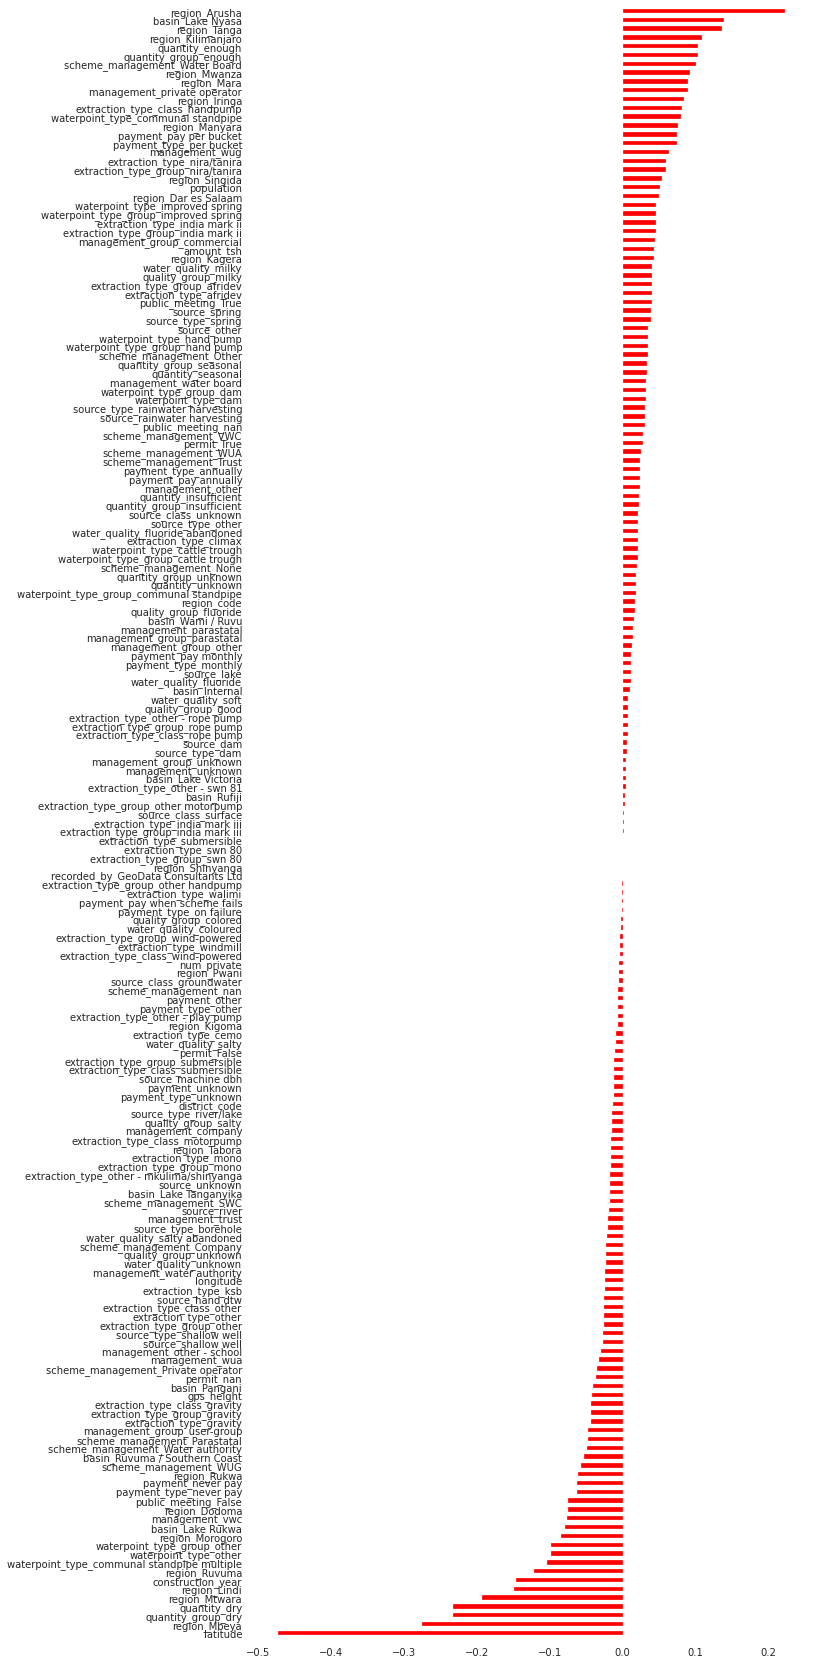

In [13]:
# Plot column coefficients
%matplotlib inline
import matplotlib.pyplot as plt

model = pipeline.named_steps['logisticregression']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
coefficients = pd.Series(model.coef_[0], encoded_columns)
plt.figure(figsize=(10,30))
coefficients.sort_values().plot.barh(color='red');

In [14]:
# Use decision tree to determine accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.9954755892255892
Validation accuracy: 0.7566498316498317


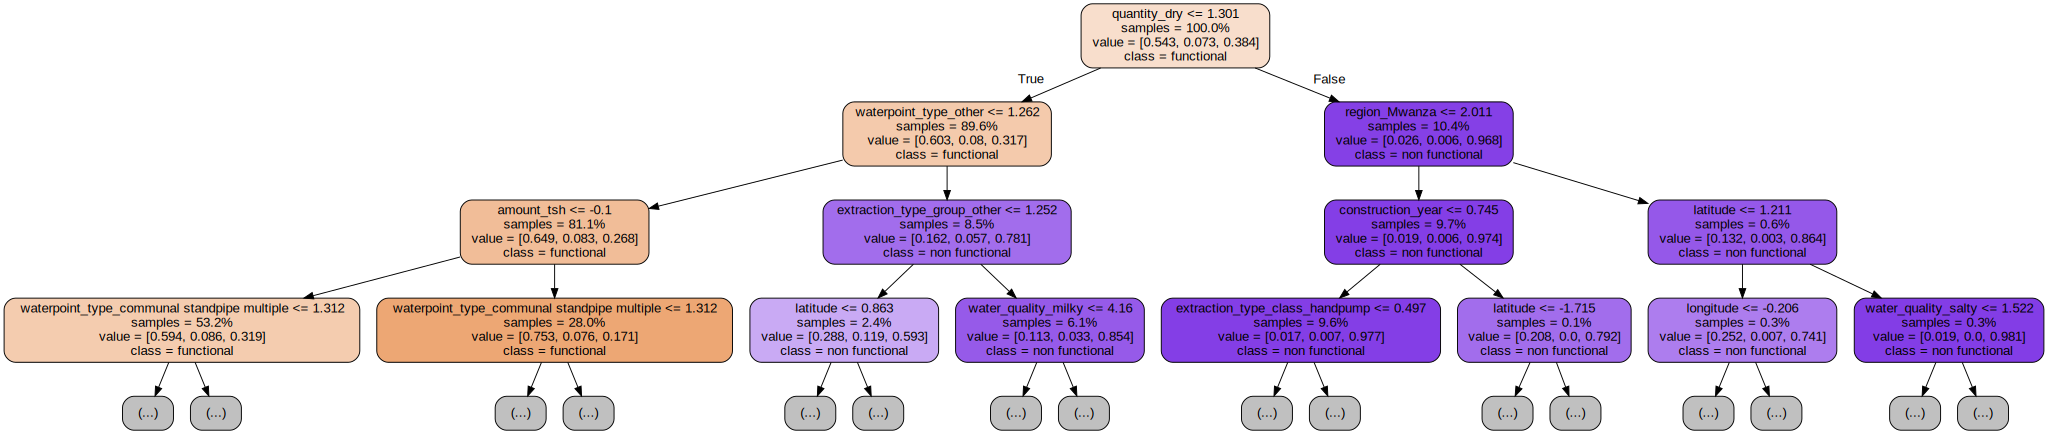

In [15]:
# Plot the decision tree
import graphviz
from sklearn.tree import export_graphviz

model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns

dot_data = export_graphviz(model,
                           out_file=None,
                           max_depth=3,
                           feature_names=encoded_columns,
                           class_names=model.classes_,
                           impurity=False,
                           filled=True,
                           proportion=True,
                           rounded=True)
display(graphviz.Source(dot_data))

In [16]:
# What happens when we reduce the complexity of the decision tree?
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=30)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.7920244107744108
Validation accuracy: 0.7642255892255893


In [17]:
# Let's modify the min sample leaf to 15
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=15)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.8189814814814815
Validation accuracy: 0.7671717171717172


In [18]:
# Now modify it to 40
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=40)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.7831860269360269
Validation accuracy: 0.756986531986532


In [19]:
# Try 35
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=35)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.7875420875420875
Validation accuracy: 0.7612794612794613


In [20]:
# We'll try 31 - 34 to see which gives us the best accuracy scores
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=31)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.7907617845117845
Validation accuracy: 0.7637205387205387


In [21]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=32)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.7902777777777777
Validation accuracy: 0.7627104377104377


In [22]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=33)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.7900042087542087
Validation accuracy: 0.7638888888888888


In [23]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=34)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)

Train accuracy: 0.7889520202020202
Validation accuracy: 0.7615319865319865


In [24]:
print('35: ', (0.7875420875420875 - 0.7612794612794613) * 100)
print('31: ', (0.7907617845117845 - 0.7637205387205387) * 100)
print('33: ', (0.7900042087542087 - 0.7638888888888888) * 100)
print('34: ', (0.7889520202020202 - 0.7615319865319865) * 100)

35:  2.626262626262621
31:  2.7041245791245783
33:  2.6115319865319897
34:  2.742003367003365


In [25]:
# 33 appears to be our best accuracy scores in terms of maximizing validation and minimizing difference
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=33)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)
print('Prediction:', y_pred)

Train accuracy: 0.7900042087542087
Validation accuracy: 0.7638888888888888
Prediction: ['functional' 'functional' 'functional' ... 'functional' 'functional'
 'non functional']


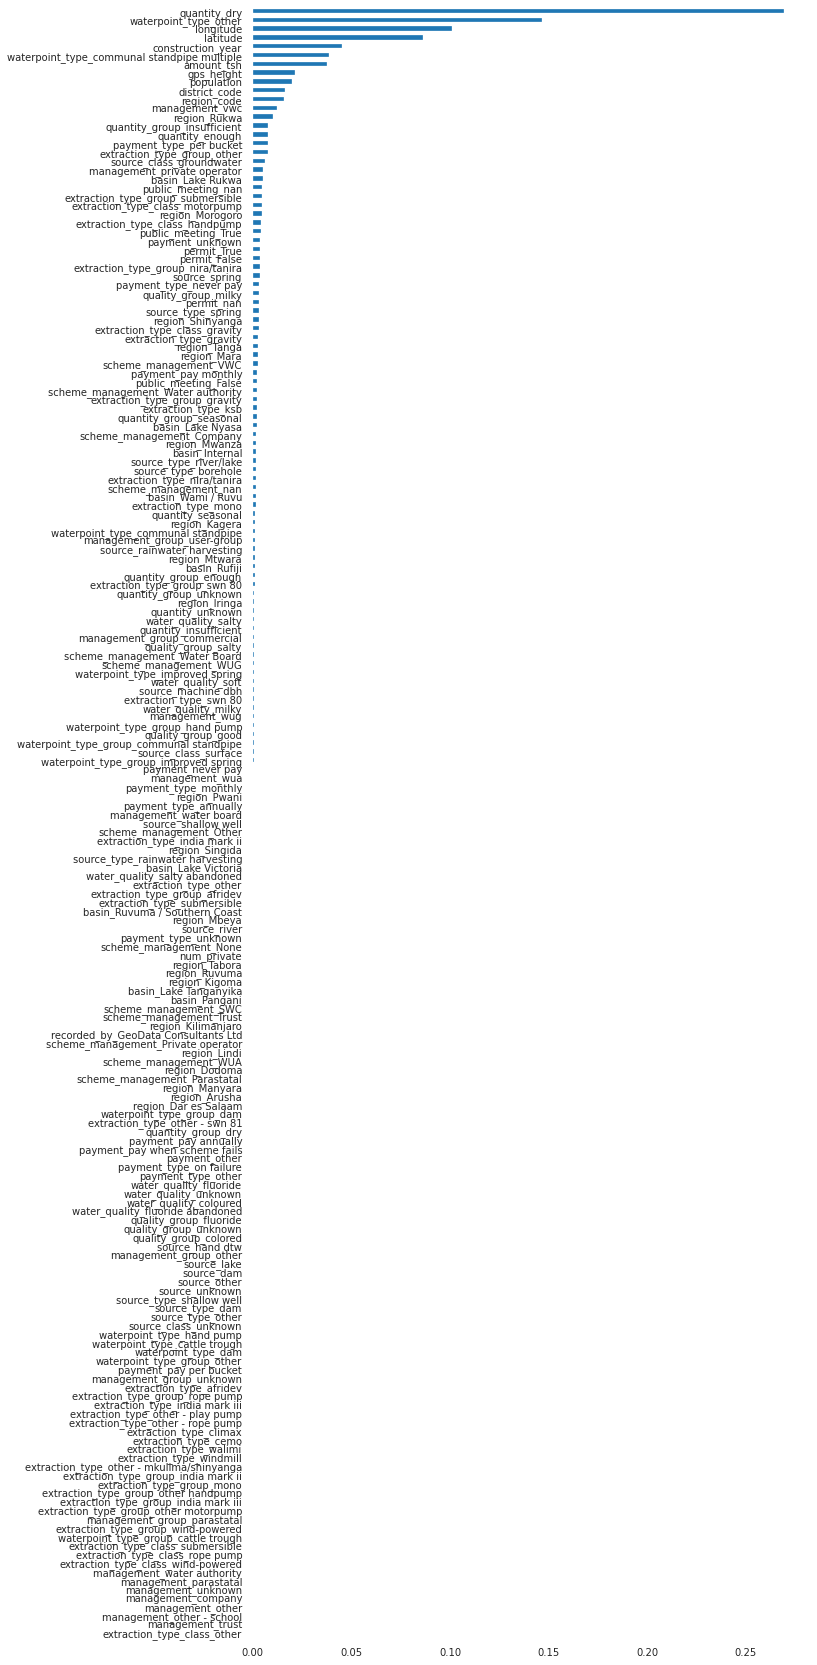

In [26]:
# Interpret feature importances of tree based model
model = pipeline.named_steps['decisiontreeclassifier']
encoder = pipeline.named_steps['onehotencoder']
encoded_columns = encoder.transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoded_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh()

# Now create our own features and maximize our validation accuracy

In [27]:
# Let's try our region_code and district_code
train_code = X_train[['region_code', 'district_code']].copy()
val_code = X_val[['region_code', 'district_code']].copy()

from sklearn.tree import DecisionTreeClassifier

code_tree = make_pipeline(
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=16, random_state=42)
)

code_tree.fit(train_code, y_train)
print('Decision Tree:')
print('Train Accuracy: ', code_tree.score(train_code, y_train))
print('Validation Accuracy: ', code_tree.score(val_code, y_val))

Decision Tree:
Train Accuracy:  0.6070707070707071
Validation Accuracy:  0.6092592592592593


In [28]:
# Let's try with quantity_group and waterpoint_type
train_code = X_train[['quantity_group', 'waterpoint_type']].copy()
val_code = X_val[['quantity_group', 'waterpoint_type']].copy()

from sklearn.tree import DecisionTreeClassifier

code_tree = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    DecisionTreeClassifier(max_depth=16, random_state=42)
)

code_tree.fit(train_code, y_train)

print('Decision Tree:')
print('Train Accuracy: ', code_tree.score(train_code, y_train))
print('Validation Accuracy: ', code_tree.score(val_code, y_val))

Decision Tree:
Train Accuracy:  0.6987794612794613
Validation Accuracy:  0.6977272727272728


In [0]:
y_pred = code_tree.predict(X_test[['quantity_group', 'waterpoint_type']])

In [32]:
# 33 appears to be our best accuracy scores in terms of maximizing validation and minimizing difference
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    StandardScaler(),
    DecisionTreeClassifier(random_state=42, min_samples_leaf=33)
)

pipeline.fit(X_train, y_train)
print(f'Train accuracy: {pipeline.score(X_train, y_train)}')
print(f'Validation accuracy: {pipeline.score(X_val, y_val)}')

y_pred = pipeline.predict(X_test)
print('Prediction:', y_pred)

Train accuracy: 0.7900042087542087
Validation accuracy: 0.7638888888888888
Prediction: ['functional' 'functional' 'functional' ... 'functional' 'functional'
 'non functional']


In [0]:
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('db_221_assignment.csv', index=False)

In [0]:
from google.colab import files
files.download('db_221_assignment.csv')